In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from time import time
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score, log_loss
from matplotlib import pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

myparams = []

In [2]:
def preprocessdataframe (df):
    imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
    imputer = imputer.fit(df.loc[:,['Age']])
    df.loc[:,'Age'] = imputer.transform(df.loc[:,['Age']])

    imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
    imputer = imputer.fit(df.loc[:,['Fare']])
    df.loc[:,'Fare'] = imputer.transform(df.loc[:,['Fare']])

    df.Embarked = df.Embarked.fillna('S')

    df = pd.get_dummies(data=df, columns=['Embarked', 'Pclass', 'Sex'])

    return df

In [3]:
def showroccurve(fpr, tpr, roc_auc, label, color):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color=color,
             lw=lw, label='ROC curve - {0} (area = {1:0.2f})'.format(label, roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [4]:
def showmultiroccurve(params): #this should be a list of dictionaries of fpr, tpr, roc_auc, label, and color
    plt.figure()
    lw = 2
    for param in params:
        plt.plot(param["fpr"], param["tpr"], color=param["color"],
             lw=lw, label='ROC curve - {0} (area = {1:0.2f})'.format(param["label"],param["roc_auc"]))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [5]:
df = pd.read_csv('~/Documents/GitHub/TiberDataScienceLearning/Data/Titanic/train.csv')
y = df[['Survived']]
x = df[['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train = preprocessdataframe(x_train)
x_test = preprocessdataframe(x_test)

Random Forest: roc_auc =  0.8232542819499342
Random Forest: log_loss_score =  0.39259640771298493


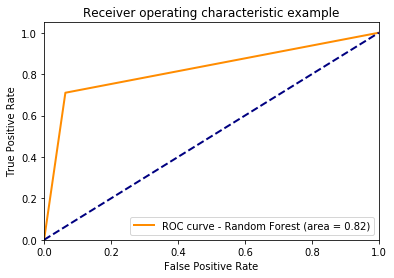

In [7]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10,
                              random_state=0)

model = clf.fit(x_train, y_train['Survived'])
y_predictions = model.predict(x_test)
y_probabilities = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictions)
roc_auc = roc_auc_score(y_test, y_predictions)
log_loss_score = log_loss(y_test, y_probabilities)
label = 'Random Forest'
print("Random Forest: roc_auc = ", roc_auc)
print("Random Forest: log_loss_score = ", log_loss_score)
showroccurve(fpr, tpr, roc_auc, label, 'darkorange') 

myparam = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc, 'label': label, 'color': 'pink'}
myparams.append(myparam)

In [11]:
aucs = dict()
for i in range(1,12):
    clf = RandomForestClassifier(max_depth=i,n_estimators=100,random_state=0)
    cross_val_roc = cross_val_score(clf, x_train, y_train['Survived'], cv=10, scoring='roc_auc')
    roc_score = np.mean(cross_val_roc)
    aucs[i] = roc_score
print("Using the max_depth hyperparameter: ", aucs)

Using the max_depth hyperparameter:  {1: 0.8310779094936072, 2: 0.8424058203854715, 3: 0.848657148729823, 4: 0.8525749256127163, 5: 0.8575032928957347, 6: 0.8572547526762643, 7: 0.8609794302381513, 8: 0.853667418929047, 9: 0.8528646095506561, 10: 0.8487897384699711, 11: 0.8496675643477969}


In [13]:
aucs = dict()
params = [.01, .05, .1, .2, .5]
for i in params:
    clf = RandomForestClassifier(min_samples_split = i,n_estimators=100,random_state=0)
    cross_val_roc = cross_val_score(clf, X=x_train, y=y_train['Survived'], cv=10, scoring='roc_auc')
    roc_score = np.mean(cross_val_roc)
    aucs[i] = roc_score
print("Using the min_samples_split hyperparameter: ", aucs)

Using the min_samples_split hyperparameter:  {0.01: 0.8566656669127599, 0.05: 0.8581270204816717, 0.1: 0.8448626282201863, 0.2: 0.8432055885544258, 0.5: 0.8317513101670079}


In [15]:
aucs = dict()
params = [.01, .05, .1, .2, .5]
for i in params:
    clf = RandomForestClassifier(min_samples_leaf = i,n_estimators=100,random_state=0)
    cross_val_roc = cross_val_score(clf, X=x_train, y=y_train['Survived'], cv=10, scoring='roc_auc')
    roc_score = np.mean(cross_val_roc)
    aucs[i] = roc_score
print("Using the min_samples_leaf hyperparameter: ", aucs)

Using the min_samples_leaf hyperparameter:  {0.01: 0.8578906450999474, 0.05: 0.8386875048939002, 0.1: 0.8259659859950558, 0.2: 0.82711731098359, 0.5: 0.5}


In [16]:
aucs = dict()
for i in range(1,8):
    clf = RandomForestClassifier(max_features=i,n_estimators=100,random_state=0)
    cross_val_roc = cross_val_score(clf, x_train, y_train['Survived'], cv=10, scoring='roc_auc')
    roc_score = np.mean(cross_val_roc)
    aucs[i] = roc_score
print("Using the max_features hyperparameter: ", aucs)

Using the max_features hyperparameter:  {1: 0.8360011381813708, 2: 0.8389051785854111, 3: 0.8449742091457206, 4: 0.8476220888284842, 5: 0.8486594908106536, 6: 0.8468162731970871, 7: 0.8450866989384431}


In [17]:
aucs = dict()
params = [.0001, .001, .01, .05, .1, .2, .5]
for i in params:
    clf = RandomForestClassifier(min_impurity_decrease = i,n_estimators=100,random_state=0)
    cross_val_roc = cross_val_score(clf, X=x_train, y=y_train['Survived'], cv=10, scoring='roc_auc')
    roc_score = np.mean(cross_val_roc)
    aucs[i] = roc_score
print("Using the min_impurity_decrease hyperparameter: ", aucs)

Using the min_impurity_decrease hyperparameter:  {0.0001: 0.8516480558631722, 0.001: 0.8535665346711859, 0.01: 0.8465867842321331, 0.05: 0.8212426381757776, 0.1: 0.7652214280121256, 0.2: 0.5, 0.5: 0.5}


In [19]:
aucs = dict()
params = [10,50,100,200,500,1000]
for i in params:
    clf = RandomForestClassifier(n_estimators=i,random_state=0)
    cross_val_roc = cross_val_score(clf, X=x_train, y=y_train['Survived'], cv=10, scoring='roc_auc')
    roc_score = np.mean(cross_val_roc)
    aucs[i] = roc_score
print("Using the n_estimators hyperparameter: ", aucs)

Using the n_estimators hyperparameter:  {10: 0.8318574378894146, 50: 0.8430122095819771, 100: 0.8449742091457206, 200: 0.8446594264908219, 500: 0.847166431759455, 1000: 0.845916424768169}


In [22]:
param_grid = [
  {'n_estimators': [10,50,100,200,500,1000], 'max_depth': range(1,12), 'min_samples_split': [.01, .05, .1, .2, .5], 'min_samples_leaf': [.01, .05, .1, .2, .5], 'max_features': range(1,8), 'min_impurity_decrease': [.0001, .001,  .01, .05, .1, .2, .5]},
 ]
clf = RandomForestClassifier()
gscv = GridSearchCV(clf, param_grid, cv=10, scoring='roc_auc')
start = time()
gscv = gscv.fit(x_train , y_train['Survived'])
stop = time()
print("Best Score: ", gscv.best_score_)
print("Best Parameters: ", gscv.best_params_)
print("Time: ", stop-start)

KeyboardInterrupt: 

In [21]:
param_grid = {'n_estimators': [10,50,100,200,500,1000], 'max_depth': range(1,12), 'min_samples_split': [.01, .05, .1, .2, .5], 'min_samples_leaf': [.01, .05, .1, .2, .5], 'max_features': range(1,8), 'min_impurity_decrease': [.001, .0001, .01, .05, .1, .2, .5]}
clf = RandomForestClassifier()
gscv = RandomizedSearchCV(clf, param_grid, cv=10, scoring='roc_auc')
start = time()
gscv = gscv.fit(x_train , y_train['Survived'])
stop = time()
print("Best Score: ", gscv.best_score_)
print("Best Parameters: ", gscv.best_params_)
print("Time: ", stop-start)

Best Score:  0.8344492780939411
Best Parameters:  {'n_estimators': 10, 'min_samples_split': 0.05, 'min_samples_leaf': 0.05, 'min_impurity_decrease': 0.001, 'max_features': 2, 'max_depth': 5}
Time:  14.989798784255981


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
